In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR


In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

In [3]:
na_counts_train = train.isnull().sum()
na_counts_train[na_counts_train != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
na_counts_test = test.isnull().sum()
na_counts_test[na_counts_test != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [5]:
bsmt_cols = [col for col in test.columns if 'Bsmt' in col]
test[test['BsmtHalfBath'].isnull()][bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [6]:
garage_cols = [col for col in test.columns if 'Garage' in col]
test[test['GarageFinish'].isnull()][garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
1514,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1532,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1540,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1553,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1557,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2894,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2910,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2914,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [7]:
class DataCleaner:
    
    
    def __init__(self, train, test):
        self.train = train.copy()
        self.test = test.copy()
        
    
    def cleanAlley(self):
        self.train.loc[:,'Alley'] = self.train['Alley'].fillna('No_Alley_Access')
        self.test.loc[:,'Alley'] = self.test['Alley'].fillna('No_Alley_Access')
    
    
    def cleanBsmt(self):
        self.cleanBsmtQual()
        self.cleanBsmtCond()
        self.cleanBsmtExposure()
        self.cleanBsmtFinType1()
        self.cleanBsmtFinType2()
        self.cleanBsmtFinSF1()
        self.cleanBsmtFinSF2()
        self.cleanBsmtUnfSF()
        self.cleanTotalBsmtSF()
        self.cleanBsmtFullBath()
        self.cleanBsmtHalfBath()
    
    def cleanBsmtQual(self):
        self.train.loc[:,'BsmtQual'] = self.train['BsmtQual'].fillna('No_Basement')
        self.test.loc[:,'BsmtQual'] = self.test['BsmtQual'].fillna('No_Basement')
        
        
    def cleanBsmtCond(self):
        self.train.loc[:,'BsmtCond'] = self.train['BsmtCond'].fillna('No_Basement')
        self.test.loc[:,'BsmtCond'] = self.test['BsmtCond'].fillna('No_Basement')
        
    
    def cleanBsmtExposure(self):
        self.train.loc[:,'BsmtExposure'] = self.train['BsmtExposure'].fillna('No_Basement')
        self.test.loc[:,'BsmtExposure'] = self.test['BsmtExposure'].fillna('No_Basement')
        
        
    def cleanBsmtFinType1(self):
        self.train.loc[:,'BsmtFinType1'] = self.train['BsmtFinType1'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType1'] = self.test['BsmtFinType1'].fillna('No_Basement')

        
    def cleanBsmtFinType2(self):
        self.train.loc[:,'BsmtFinType2'] = self.train['BsmtFinType2'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType2'] = self.test['BsmtFinType2'].fillna('No_Basement')
        
        
    def cleanBsmtFinSF1(self):

        self.train.loc[:,'BsmtFinSF1'] = self.train['BsmtFinSF1'].fillna(0)
        self.test.loc[:,'BsmtFinSF1'] = self.test['BsmtFinSF1'].fillna(0)

        
    def cleanBsmtFinSF2(self):
        self.train.loc[:,'BsmtFinSF2'] = self.train['BsmtFinSF2'].fillna(0)
        self.test.loc[:,'BsmtFinSF2'] = self.test['BsmtFinSF2'].fillna(0)
        

    def cleanBsmtUnfSF(self):
        self.train.loc[:,'BsmtUnfSF'] = self.train['BsmtUnfSF'].fillna(0)
        self.test.loc[:,'BsmtUnfSF'] = self.test['BsmtUnfSF'].fillna(0)
        
        
    def cleanTotalBsmtSF(self):
        self.train.loc[:,'TotalBsmtSF'] = self.train['TotalBsmtSF'].fillna(0)   
        self.test.loc[:,'TotalBsmtSF'] = self.test['TotalBsmtSF'].fillna(0)
        
        
    def cleanBsmtFullBath(self):
        self.train.loc[:,'BsmtFullBath'] = self.train['BsmtFullBath'].fillna(0)
        self.test.loc[:,'BsmtFullBath'] = self.test['BsmtFullBath'].fillna(0)
        
    def cleanBsmtHalfBath(self):
        self.train.loc[:,'BsmtHalfBath'] = self.train['BsmtHalfBath'].fillna(0)
        self.test.loc[:,'BsmtHalfBath'] = self.test['BsmtHalfBath'].fillna(0)
    
    
    def cleanFireplaceQu(self):
        self.train.loc[:,'FireplaceQu'] = self.train['FireplaceQu'].fillna('No_Fireplace')
        self.test.loc[:,'FireplaceQu'] = self.test['FireplaceQu'].fillna('No_Fireplace')
    
    
    def cleanGarage(self):
        self.cleanGarageType()
        self.cleanGarageYrBlt()
        self.cleanGarageFinish()
        self.cleanGarageQual()
        self.cleanGarageCond()
        self.cleanGarageCars()
        self.cleanGarageArea()
        
        
    def cleanGarageType(self):
        self.train.loc[:,'GarageType'] = self.train['GarageType'].fillna('No_Garage')
        self.test.loc[:,'GarageType'] = self.test['GarageType'].fillna('No_Garage')
        
        
    def cleanGarageYrBlt(self):
        self.train.loc[:,'GarageYrBlt'] = self.train['GarageYrBlt'].fillna(0)
        self.test.loc[:,'GarageYrBlt'] = self.test['GarageYrBlt'].fillna(0)

        
    def cleanGarageFinish(self):
        self.train.loc[:,'GarageFinish'] = self.train['GarageFinish'].fillna('No_Garage')
        self.test.loc[:,'GarageFinish'] = self.test['GarageFinish'].fillna('No_Garage')
        
        
    def cleanGarageQual(self):
        self.train.loc[:,'GarageQual'] = self.train['GarageQual'].fillna('No_Garage')        
        self.test.loc[:,'GarageQual'] = self.test['GarageQual'].fillna('No_Garage')
        
          
    def cleanGarageCond(self):
        self.train.loc[:,'GarageCond'] = self.train['GarageCond'].fillna('No_Garage')        
        self.test.loc[:,'GarageCond'] = self.test['GarageCond'].fillna('No_Garage')
        
        
    def cleanGarageCars(self):
        self.train.loc[:,'GarageCars'] = self.train['GarageCars'].fillna(0)        
        self.test.loc[:,'GarageCars'] = self.test['GarageCars'].fillna(0)
        
        
        
    def cleanGarageArea(self):
        self.train.loc[:,'GarageArea'] = self.train['GarageArea'].fillna(0)        
        self.test.loc[:,'GarageArea'] = self.test['GarageArea'].fillna(0)
        
        
    def cleanPoolQC(self):
        self.train.loc[:,'PoolQC'] = self.train['PoolQC'].fillna('No_Pool')
        self.test.loc[:,'PoolQC'] = self.test['PoolQC'].fillna('No_Pool')
    
    
    def cleanFence(self):
        self.train.loc[:,'Fence'] = self.train['Fence'].fillna('No_Fence')
        self.test.loc[:,'Fence'] = self.test['Fence'].fillna('No_Fence')

    
    def cleanMiscFeature(self):
        self.train.loc[:,'MiscFeature'] = self.train['MiscFeature'].fillna('No_Misc_Feature')
        self.test.loc[:,'MiscFeature'] = self.test['MiscFeature'].fillna('No_Misc_Feature')

    
    def cleanLotFrontage(self):
         self.imputeColumn('LotFrontage')
        
        
    def cleanElectrical(self):
        self.imputeColumn('Electrical')
        
        
    def cleanMasVnrType(self):
        self.imputeColumn('MasVnrType')
        
    
    def cleanMasVnrArea(self):
        self.imputeColumn('MasVnrArea')
        
        
    def cleanMSZoning(self):
        self.imputeColumn('MSZoning')
        
    def cleanUtilities(self):
        self.imputeColumn('Utilities')
        
        
    def cleanExterior1st(self):
        self.imputeColumn('Exterior1st')
        
    def cleanExterior2nd(self):
        self.imputeColumn('Exterior2nd')
        
    def cleanKitchenQual(self):
        self.imputeColumn('KitchenQual')
        
        
    def cleanFunctional(self):
        self.imputeColumn('Functional')
        
        
    def cleanSaleType(self):
        self.imputeColumn('SaleType')
        
        
    def imputeColumn(self, colName):
        train, test = self.dummify(colName)
        missing_train = train[train[colName].isnull()]
        train_na = train[train[colName].notnull()]
        missing_test = test[test[colName].isnull()]
        
        isMissingFeatureCol_Train = sum(missing_train.columns[missing_train.isnull().sum() != 0] != colName) == 0
        isMissingFeatureCol_Test = sum(missing_test.columns[missing_test.isnull().sum() != 0] != colName) == 0

        if (isMissingFeatureCol_Train) & (isMissingFeatureCol_Test):
            print('Dropping Rows')
            train_na = train[train[colName].notnull()]
            train_na = train_na.dropna()
            train_na_X = train_na.loc[:,train_na.columns.difference([colName,'SalePrice'])]
            train_na_y = train_na[colName]
            
            missing_train = missing_train.loc[:,missing_train.columns.difference([colName, 'SalePrice'])]
            missing_test = missing_test.loc[:,missing_test.columns.difference([colName, 'SalePrice'])]
             
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
                
            
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed  
        else:
            print('DroppingCols')
            colsWithNA = train_na.columns[train_na.isnull().sum() != 0].to_list()
            colsWithNA_Missing = missing_train.columns[missing_train.isnull().sum() != 0].to_list()
            targetCols = [colName,'SalePrice']
            colsToDrop = targetCols + colsWithNA + colsWithNA_Missing

            train_na_X = train_na.loc[:,train_na.columns.difference(colsToDrop)]
            train_na_y = train_na[colName]

            missing_train = missing_train.loc[:,missing_train.columns.difference(colsToDrop)]
            missing_test = missing_test.loc[:,missing_test.columns.difference(colsToDrop)]
            
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
        
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed
                
    def randomForestImputation(self, train_X, train_y, forestType, cv):
        
        if forestType == 'object':
            rf = RandomForestClassifier()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(confusion_matrix(predictions, y_test))
            print(accuracy_score(predictions, y_test))
            print(precision_score(predictions, y_test, average='weighted'))
            
        else:
            rf = RandomForestRegressor()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(pd.DataFrame(predictions,y_test))
            print(mean_squared_error(predictions, y_test))
        
        return rf
            
    '''
    def cleanAllColumns(self):
        self.cleanAlley()
        self.cleanBsmt()
        self.cleanElectrical()
        self.cleanFence()
        self.cleanFireplaceQu()
        self.cleanGarage()
        self.cleanMasVnrArea()
        self.cleanMasVnrType()
        self.cleanMiscFeature()
        self.cleanPoolQC()
        self.cleanMSZoning()
        self.cleanUtilities()
        self.cleanExterior1st()
        self.cleanExterior2nd()
        self.cleanKitchenQual()
        self.cleanFunctional()
        self.cleanSaleType()   
    '''

        
    def dummify(self, notCols):
        cat_cols = self.train.dtypes[self.train.dtypes == 'object'].index.to_list()
        
        try:
            cat_cols.remove(notCols)
        except:
            print('Column not in category cols')
        
        dum_train = pd.DataFrame()
        dum_test = pd.DataFrame()
        dummies_train = []
        dummies_test = []
        for col in cat_cols:
            dum_train = pd.get_dummies(self.train[col], prefix=f'{col}Dummy', drop_first=True)
            dum_test = pd.get_dummies(self.test[col], prefix= f'{col}Dummy', drop_first=True)
            dummies_train.append(dum_train)
            dummies_test.append(dum_test)
            
        
        concat_dummies_train = pd.concat(dummies_train, axis=1)
        train = pd.concat([self.train, concat_dummies_train], axis=1)
        train = train.drop(cat_cols, axis=1)
       
        concat_dummies_test = pd.concat(dummies_test, axis=1)
        test = pd.concat([self.test, concat_dummies_test],axis=1)
        test = test.drop(cat_cols, axis=1)
        
        missingCols = set(train.columns) - set(test.columns)
        for col in missingCols:
            if col != 'SalePrice':
                test[col] = 0
                
        
        missingCols = set(test.columns) - set(train.columns)        
        for col in missingCols:
            train[col] = 0
            

        return [train, test]
    
    
    def ordinalEncode(self):
        ordCols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
               'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars','MoSold', 'YrSold']
        
        full = pd.concat([self.train[ordCols], self.test[ordCols]],axis=0)
        
        ordEnc = OrdinalEncoder()
        ordEnc.fit(full)
        self.train[ordCols] = ordEnc.transform(self.train[ordCols])
        self.test[ordCols] = ordEnc.transform(self.test[ordCols])        
        
    def getCategoryColumns(self):
        catColsTrain = self.train.columns[self.train.dtypes == 'object']
        catColsTest = self.test.columns[self.test.dtypes == 'object']
        
        return [catColsTrain, catColsTest]
    
    def getNumericColumns(self):
        numColsTrain = self.train.columns[self.train.dtypes != 'object']
        numColsTest = self.test.columns[self.test.dtypes != 'object']
        
        return [numColsTrain, numColsTest]
        
    
            
            
        
        

In [8]:
cleaned = DataCleaner(train, test)

In [9]:
cleaned.cleanAlley()
cleaned.cleanBsmtQual()
cleaned.cleanBsmtCond()
cleaned.cleanBsmtExposure()
cleaned.cleanBsmtFinType1()
cleaned.cleanBsmtFinType2()
cleaned.cleanBsmtFinSF1()
cleaned.cleanBsmtFinSF2()
cleaned.cleanBsmtUnfSF()
cleaned.cleanTotalBsmtSF()
cleaned.cleanBsmtHalfBath()
cleaned.cleanBsmtFullBath()
cleaned.cleanFireplaceQu()
cleaned.cleanGarageType()
cleaned.cleanGarageYrBlt()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageCond()
cleaned.cleanGarageCars()
cleaned.cleanGarageArea()
cleaned.cleanPoolQC()
cleaned.cleanFence()
cleaned.cleanMiscFeature()

In [10]:
cleaned.cleanElectrical()
cleaned.cleanMSZoning()
cleaned.cleanUtilities()
cleaned.cleanExterior1st()
cleaned.cleanExterior2nd()
cleaned.cleanKitchenQual()
cleaned.cleanFunctional()
cleaned.cleanSaleType()
cleaned.cleanMasVnrType()
cleaned.cleanMasVnrArea()
cleaned.cleanLotFrontage()

Dropping Rows
[[  0   1   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [ 17   5   1 215]]
0.899581589958159
0.99581589958159
DroppingCols
[[  0   0   0   0   0]
 [  0  11   0   1   0]
 [  0   0   0   0   0]
 [  3   1   0 218   9]
 [  3   0   1   8  37]]
0.910958904109589
0.9323782642804481
DroppingCols
[[292]]
1.0
1.0
Dropping Rows
[[ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  1  0  1]
 [ 1  0  1  1  1 29  0  0  1  1  0]
 [ 0  0  1  0  1  0 10  0  0  1  1]
 [ 0  0  0  0  0  0  0  3  0  1  0]
 [ 0  0  0  0  0  0  0  0 79  1  1]
 [ 1  0  4  0  0  1  3  0  0 38  2]
 [ 0  0  0  0  0  0  0  1  0  0  1]]
0.8828451882845189
0.9204530476497005
Dropping Rows
[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  1  0  2  0  0  

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  9   0   4   0]
 [  0   0   0   0]
 [  6   0  66   3]
 [  0   8  21 122]]
0.8242677824267782
0.8768686376385121
Dropping Rows
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  2   1   7   6   2 221]]
0.9246861924686193
1.0
Dropping Rows
[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0  22   0   0]
 [  0   0   0   0   0   0   0]
 [  5   1   2   1   2   1 205]]
0.9497907949790795
0.9923291492329149
DroppingCols
[[  0   0   0   0]
 [  1  56  11   6]
 [  1  33 161   1]
 [  0   5   1  15]]
0.7972508591065293
0.827518599582877
Column not in category cols
DroppingCols
                 0
MasVnrArea        
135.0       164.65
0.0           0.00
164.0       290.84
428.0       308.68
0.0           0.00
...            ...
0.0           0.00
312.0         0.00
0.0           0.00
651.0       432.59
302.0       262.75


In [11]:
cleaned.ordinalEncode()

# EDA

In [12]:
trainCatCols, testCatCols = cleaned.getCategoryColumns()

In [13]:
trainNumCols, testNumCols = cleaned.getNumericColumns()

In [14]:
def getHistograms(cols, data):
    f, axes = plt.subplots(round(len(cols)/2), 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
            
        if col == 'GarageYrBlt':
            continue
        #print(rowIdx,colIdx)
        ax = sns.histplot(x=col, data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    

In [15]:
def getBoxplots(cols, data):
    f, axes = plt.subplots(round(len(cols)/2), 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        #print(rowIdx,colIdx)
        if col == 'GarageYrBlt':
            continue
        ax = sns.boxplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    

In [16]:
def getScatterplots(cols, data):
    f, axes = plt.subplots(round(len(cols)/2), 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        if col == 'GarageYrBlt':
            continue
        #print(rowIdx,colIdx)
        ax = sns.scatterplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        colIdx += 1
    f.tight_layout()

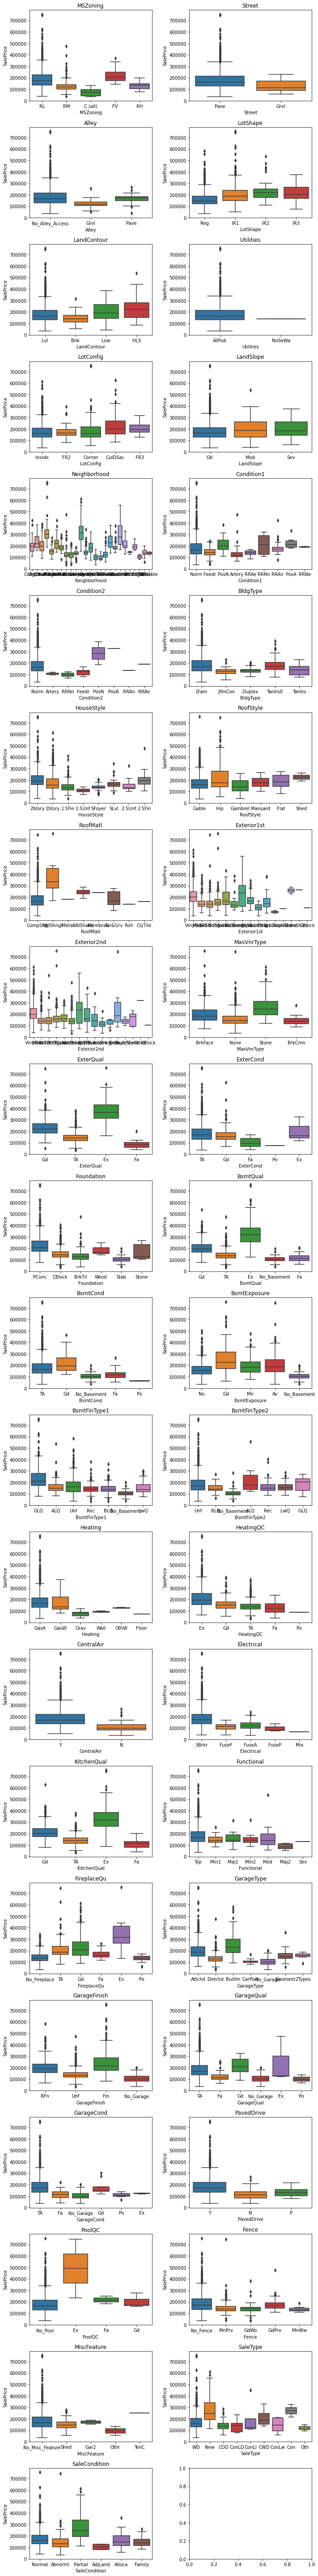

In [17]:
getBoxplots(trainCatCols, cleaned.train)

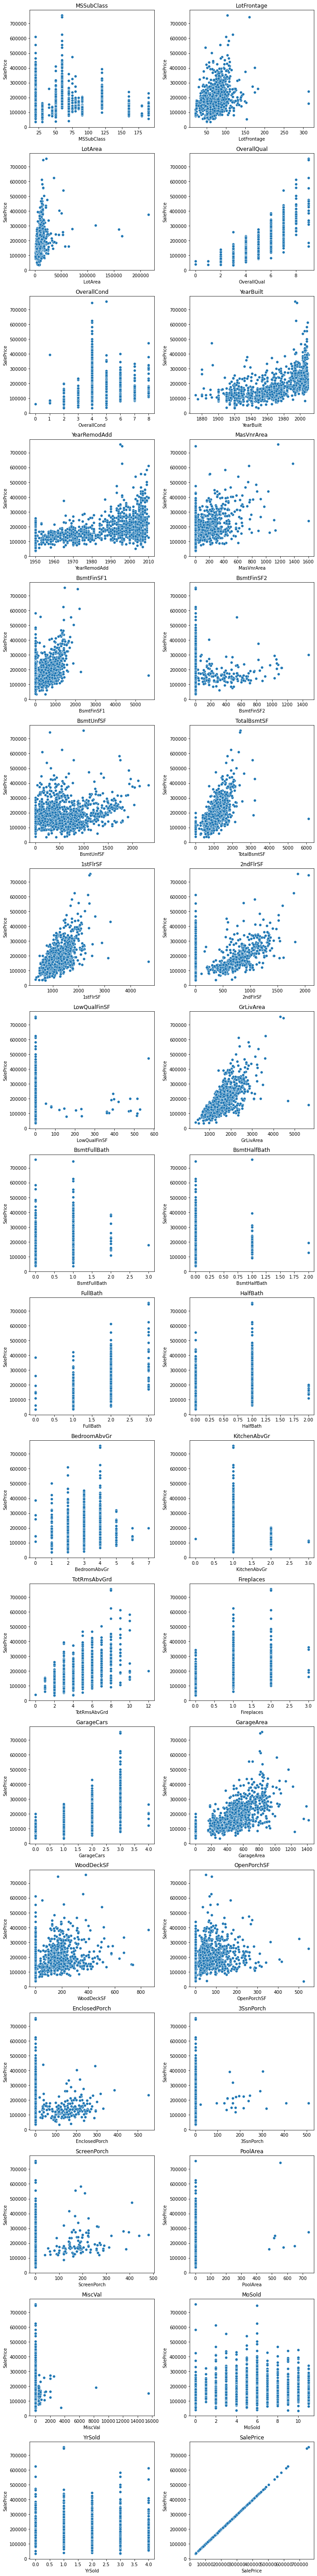

In [18]:
getScatterplots(trainNumCols, cleaned.train)

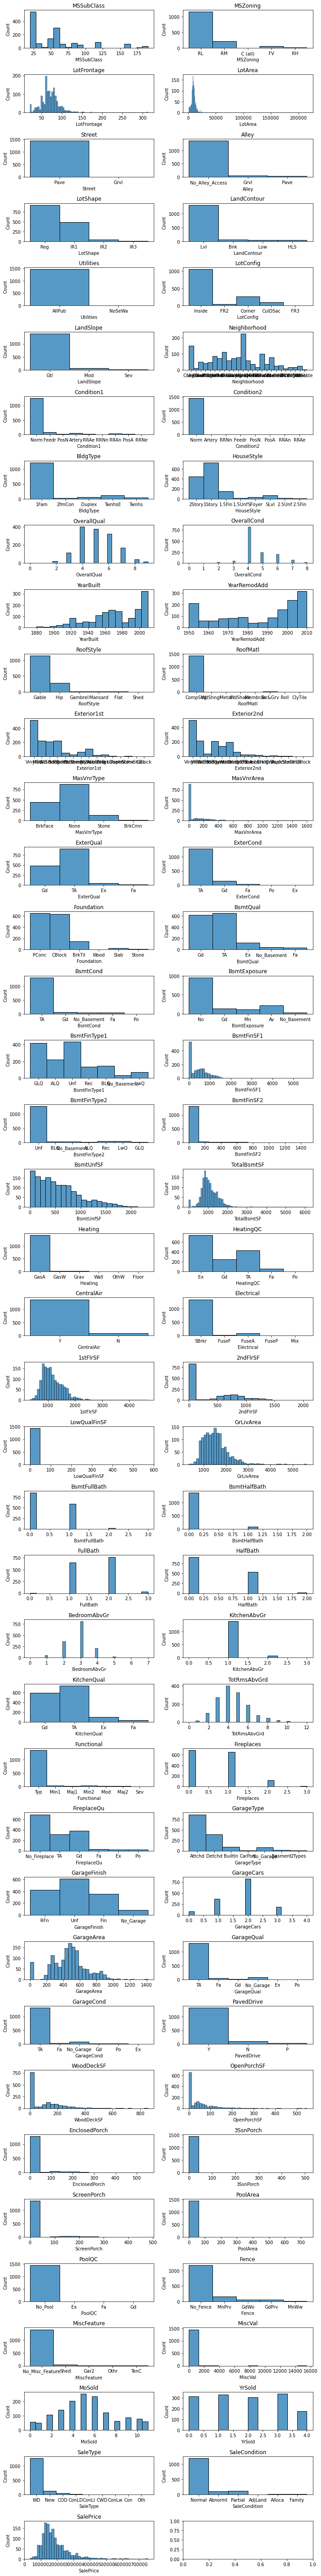

In [19]:
getHistograms(cleaned.train.columns, cleaned.train)

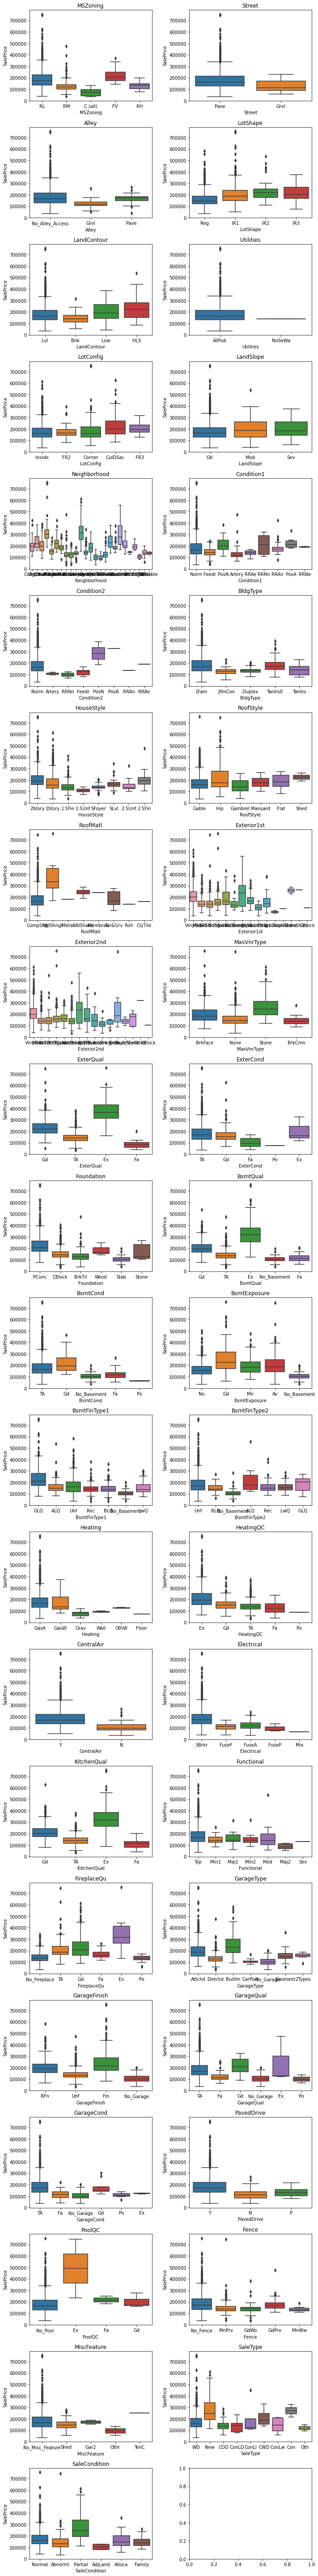

In [20]:
getBoxplots(testCatCols, cleaned.test)

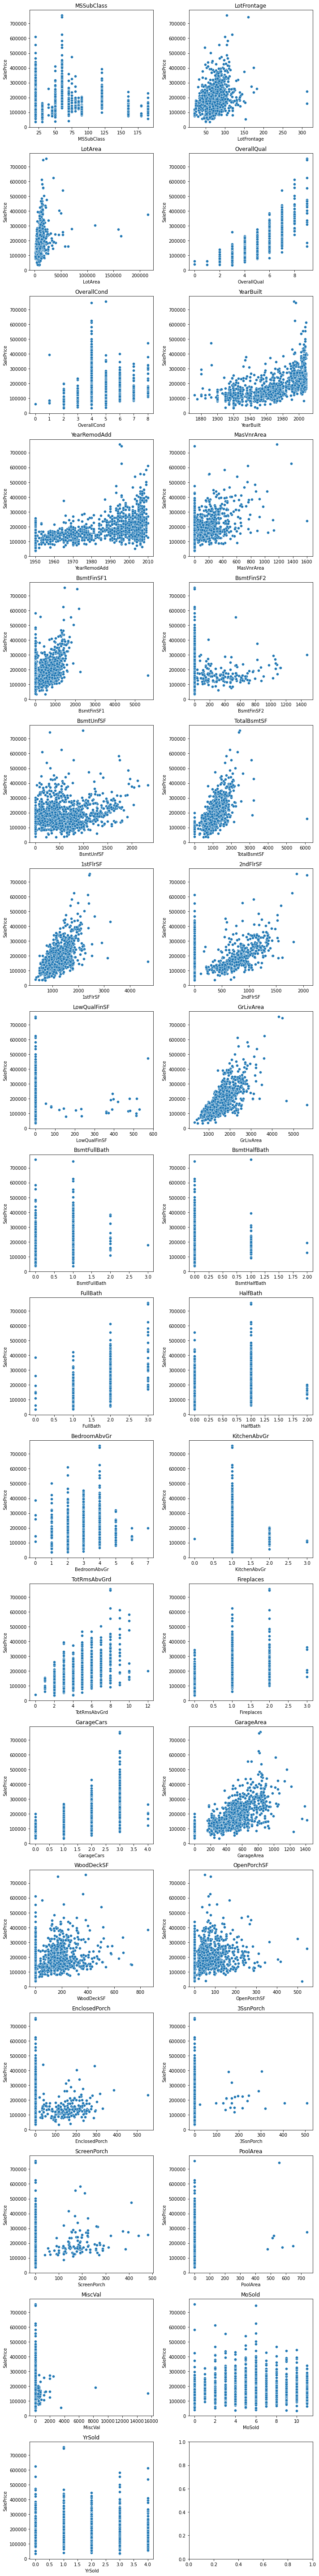

In [21]:
getScatterplots(testNumCols, cleaned.test)

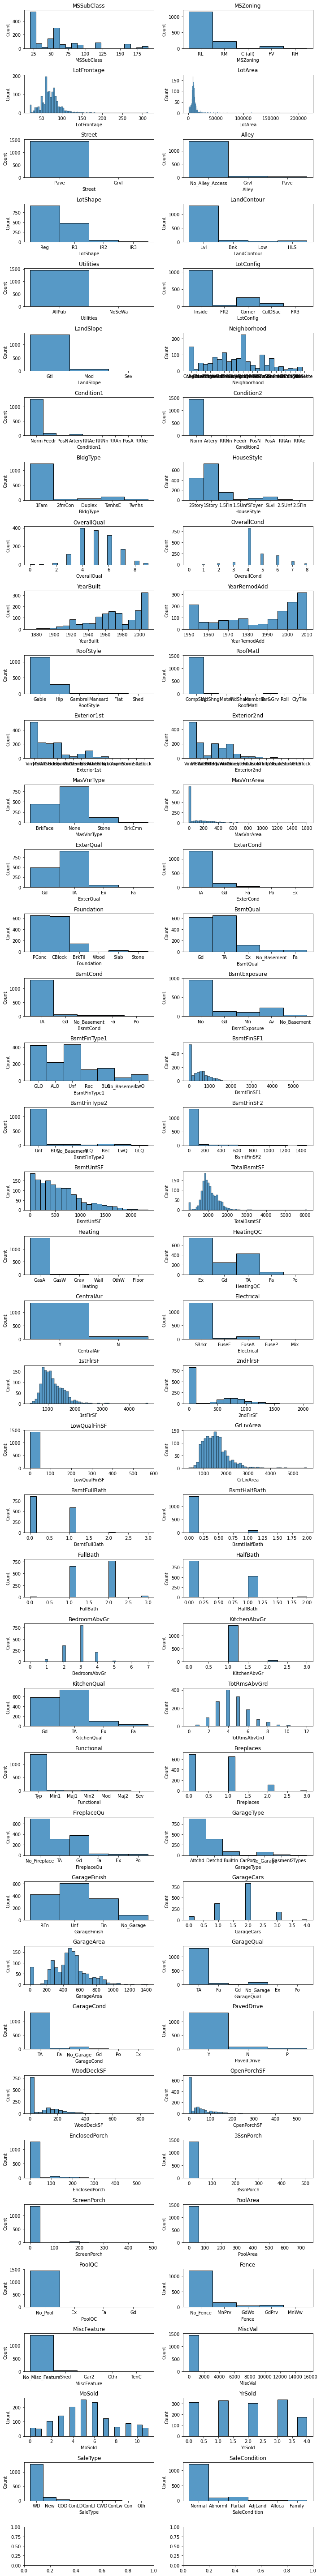

In [22]:
getHistograms(cleaned.test.columns, cleaned.test)

# Feature Engineering

In [23]:
def addHasGarage(data):
    data['hasGarage'] = data['GarageType'].apply(lambda x: 0 if x=='No_Garage' else 1)

    
def addHasBsmt(data): 
    data['hasBsmt'] = data['BsmtQual'].apply(lambda x: 0 if x=='No_Basement' else 1)
    
def addHasAlley_Access(data): 
    data['hasAlley_Access'] = data['Alley'].apply(lambda x: 0 if x=='No_Alley_Access' else 1)
    
def addHasFireplace(data):
    data['hasFireplace'] = data['FireplaceQu'].apply(lambda x: 0 if x=='No_Fireplace' else 1)
    
def addHasPool(data):
    data['hasPool'] = data['PoolQC'].apply(lambda x: 0 if x=='No_Pool' else 1)

    
def addHasFence(data): 
    data['hasFence'] = data['Fence'].apply(lambda x: 0 if x=='No_Fence' else 1)

    
def addHasMisc_Feature(data):
    data['hasMisc_Feature'] = data['MiscFeature'].apply(lambda x: 0 if x=='No_Misc_Feature' else 1)
    
def getNumFloors(row):
    count = 0
    if row['TotalBsmtSF'] != 0:
        count = count + 1
    if row['1stFlrSF'] != 0:
        count = count + 1
    if row['2ndFlrSF'] != 0:
        count = count + 1
    return count


def addGrLivAreaHighQualitySF(data):
    data['GrLivAreaHighQualitySF'] = (data['1stFlrSF'] + data['2ndFlrSF']) - data['LowQualFinSF']
    
def addTotalIndoorSF(data):
    data['TotalIndoorSF'] = data['TotalBsmtSF'] + data['GrLivAreaHighQualitySF'] + data['GarageArea']

def addTotalOutdoorSF(data):
    data['TotalOutdoorSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch'] 
    + data['WoodDeckSF'] + data['PoolArea']
    

def addBsmtBaths(data):
    data['BsmtBaths'] = data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

def addBaths(data):
    data['Baths'] = data['FullBath'] + (0.5 * data['HalfBath'])
    
    
def plotIndicators(data):
    f, axes = plt.subplots(7,1, figsize=(10,30))
    cols = ['Garage', 'Bsmt', 'Alley_Access','Fireplace', 'Pool', 'Fence', 'Misc_Feature']

    
    for idx, col in enumerate(cols):
        grouped_garage = data.groupby(f'has{col}').mean().reset_index()
        ax = sns.barplot(grouped_garage[f'has{col}'],grouped_garage['SalePrice'], ax = axes[idx])

    
    


In [24]:
addHasGarage(cleaned.train)
addHasGarage(cleaned.test)

addHasBsmt(cleaned.train)
addHasBsmt(cleaned.test)

addHasAlley_Access(cleaned.train)
addHasAlley_Access(cleaned.test)

addHasFireplace(cleaned.train)
addHasFireplace(cleaned.test)

addHasPool(cleaned.train)
addHasPool(cleaned.test)

addHasFence(cleaned.train)
addHasFence(cleaned.test)

addHasMisc_Feature(cleaned.train)
addHasMisc_Feature(cleaned.test)


addGrLivAreaHighQualitySF(cleaned.train)
addGrLivAreaHighQualitySF(cleaned.test)


addTotalIndoorSF(cleaned.train)
addTotalIndoorSF(cleaned.test)


addTotalOutdoorSF(cleaned.train)
addTotalOutdoorSF(cleaned.test)


addBsmtBaths(cleaned.train)
addBsmtBaths(cleaned.test)


addBaths(cleaned.train)
addBaths(cleaned.test)

cleaned.train['NumFloors'] = cleaned.train.apply(getNumFloors, axis=1)
cleaned.test['NumFloors'] = cleaned.test.apply(getNumFloors, axis=1)

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

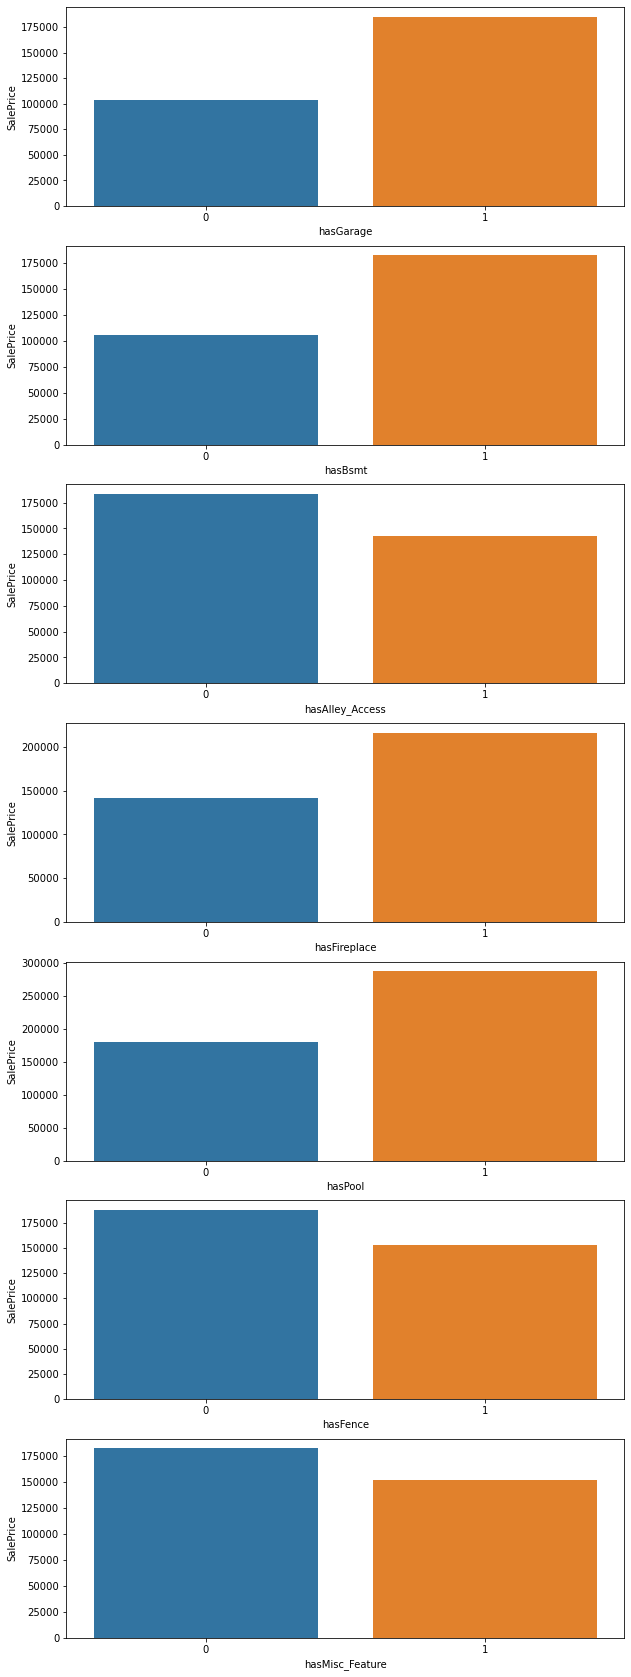

In [25]:
plotIndicators(cleaned.train)

In [26]:
'''
cleaned.train = cleaned.train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath','1stFlrSF','2ndFlrSF',
                                    'LowQualFinSF','GrLivArea','OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch',
                                   'WoodDeckSF', 'PoolArea','GrLivAreaHighQualitySF','GarageArea'], axis=1)
'''


"\ncleaned.train = cleaned.train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath','1stFlrSF','2ndFlrSF',\n                                    'LowQualFinSF','GrLivArea','OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch',\n                                   'WoodDeckSF', 'PoolArea','GrLivAreaHighQualitySF','GarageArea'], axis=1)\n"

# Dummify Columns

In [27]:
trained, tested = cleaned.dummify('')

Column not in category cols


In [28]:
X = trained.loc[:, trained.columns != 'SalePrice']
y = trained['SalePrice']

In [29]:
split_indices = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, y):
    split_indices.append([train_index, test_index])
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [30]:
gbr = GradientBoostingRegressor()
params = {'n_estimators': [2000],'loss':['ls'],'max_depth':[3,4,5],'max_features':[None,'sqrt']}
grid = GridSearchCV(gbr, param_grid=params, cv=kf)
grid.fit(X, y)
grid.cv_results_

{'mean_fit_time': array([12.65368714,  1.202631  , 16.7354568 ,  1.39844856, 20.60223079,
         1.69568911]),
 'std_fit_time': array([0.47020924, 0.05791967, 0.70097174, 0.01436422, 0.44444264,
        0.03362759]),
 'mean_score_time': array([0.01005082, 0.01032648, 0.01430459, 0.01473336, 0.01505957,
        0.01866016]),
 'std_score_time': array([0.00065468, 0.00027782, 0.00253098, 0.0004236 , 0.00050118,
        0.00062878]),
 'param_loss': masked_array(data=['ls', 'ls', 'ls', 'ls', 'ls', 'ls'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 4, 4, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[None, 'sqrt', None, 'sqrt', None, 'sqrt'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'par

In [31]:
grid.best_params_

{'loss': 'ls', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 2000}

In [32]:
grid.best_score_

0.8610791139381199

In [33]:
predictions = grid.predict(X)
mean_squared_log_error(predictions, y)

1.4981073923880437e-07

In [34]:
grid.best_estimator_.feature_importances_

array([1.81818258e-03, 1.05158496e-02, 7.71730540e-03, 1.04339988e-01,
       6.36754035e-03, 5.10549012e-02, 1.91520929e-02, 1.87116394e-03,
       4.93801163e-02, 3.58187792e-04, 2.38772030e-03, 7.79610204e-02,
       3.85247681e-02, 4.56026365e-02, 2.60010629e-05, 3.27186899e-02,
       7.36985180e-04, 1.53953821e-04, 2.47660847e-02, 2.92311139e-03,
       5.12445025e-03, 6.12436236e-04, 1.08005733e-02, 7.03860606e-03,
       9.28055124e-03, 6.59054209e-02, 2.55007231e-02, 3.36406419e-03,
       4.25266261e-02, 2.17491417e-04, 1.50099106e-04, 6.92298811e-04,
       2.02999120e-04, 1.08568104e-04, 1.39739796e-03, 6.49680357e-04,
       1.21886483e-04, 1.06929363e-03, 3.04711470e-05, 2.96833792e-02,
       1.68101535e-04, 5.60130096e-05, 3.30175556e-05, 1.97868567e-02,
       6.75628296e-02, 3.20575979e-03, 2.97782930e-03, 2.86538418e-02,
       6.25884596e-05, 2.51447965e-04, 2.09896262e-05, 3.15710835e-03,
       1.37240130e-03, 8.84443669e-05, 4.30970158e-04, 1.45156582e-04,
      

In [35]:
def getFeatureImportance(num):
    grid.best_estimator_.feature_importances_
    X.columns.to_list()
    feature_importances = zip(X.columns.to_list(), grid.best_estimator_.feature_importances_)
    sorted_importance = sorted(list(feature_importances),key= lambda x: x[1],reverse=True)

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_importance[:num]], [x[1] for x in sorted_importance[:num]])
    plt.xticks(rotation=90)

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


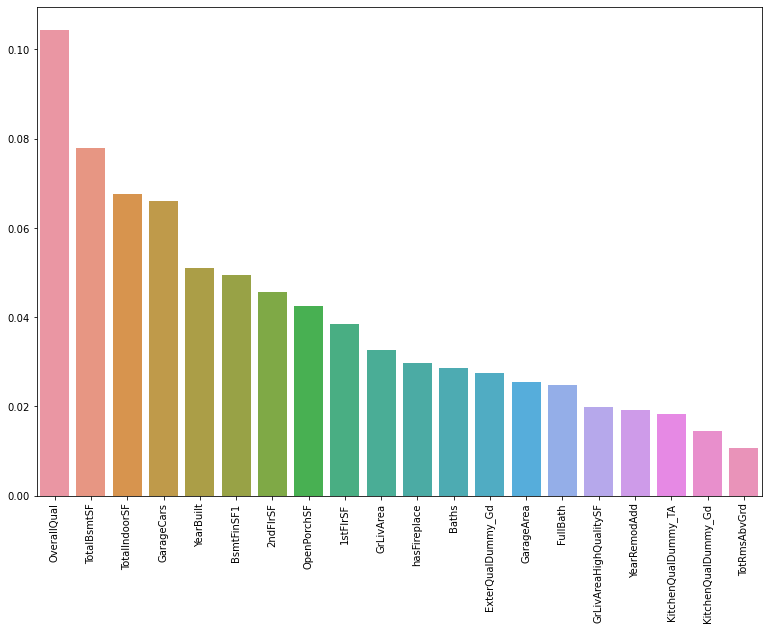

In [36]:
getFeatureImportance(20)

# Examining Large Prediction Errors

In [37]:
train_indices = split_indices[2][0]
test_indices = split_indices[2][1]
train_data = X.iloc[test_indices]
predictions = grid.predict(train_data)
actuals = y.iloc[test_indices]

In [38]:
split_results = pd.DataFrame(predictions, actuals).reset_index().rename(columns={'SalePrice':'Predictions',0:'Actuals'})
split_results['AbsDifference'] = abs(split_results['Predictions'] - split_results['Actuals'])
split_results['Difference'] = split_results['Predictions'] - split_results['Actuals']
split_results_sorted = split_results.sort_values(by='AbsDifference', ascending=False)
split_results_sorted

,Predictions,Actuals,AbsDifference,Difference
41,130000,130260.644928,260.644928,-260.644928
150,190000,190239.472699,239.472699,-239.472699
125,140000,140226.593992,226.593992,-226.593992
240,195000,194776.045551,223.954449,223.954449
60,180000,180206.893317,206.893317,-206.893317
...,...,...,...,...
206,88000,87999.669509,0.330491,0.330491
85,125000,125000.131749,0.131749,-0.131749
192,172000,172000.094274,0.094274,-0.094274
169,164000,163999.935363,0.064637,0.064637


In [39]:
train_data = train_data.reset_index()

In [40]:
train_data_sorted = train_data.iloc[split_results_sorted.index]

In [41]:
larger_errors = train_data_sorted.iloc[:int(len(train_data_sorted)/2)]
smaller_errors = train_data_sorted.iloc[int(len(train_data_sorted)/2):]

In [42]:
larger_errors

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleTypeDummy_ConLI,SaleTypeDummy_ConLw,SaleTypeDummy_New,SaleTypeDummy_Oth,SaleTypeDummy_WD,SaleConditionDummy_AdjLand,SaleConditionDummy_Alloca,SaleConditionDummy_Family,SaleConditionDummy_Normal,SaleConditionDummy_Partial
41,146,160,24.00,2522,5.0,4.0,2004,2006,50.0,0,...,0,0,0,0,1,0,0,0,1,0
150,740,60,65.00,9313,6.0,4.0,2004,2004,0.0,0,...,0,0,0,0,1,0,0,0,1,0
125,594,120,36.42,4435,5.0,4.0,2003,2003,170.0,685,...,0,0,0,0,1,0,0,0,1,0
240,1189,60,68.00,8935,6.0,4.0,2002,2002,95.0,0,...,0,0,0,0,1,0,0,0,1,0
60,249,60,72.00,11317,6.0,4.0,2003,2003,101.0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1445,20,63.00,8500,6.0,4.0,2004,2004,106.0,0,...,0,0,0,0,1,0,0,0,1,0
257,1296,20,70.00,8400,4.0,4.0,1968,1968,168.0,1016,...,0,0,0,0,1,0,0,0,1,0
270,1376,20,89.00,10991,7.0,4.0,2007,2007,80.0,0,...,0,0,1,0,0,0,0,0,0,1
136,669,20,86.45,14175,4.0,5.0,1956,1987,0.0,988,...,0,0,0,0,1,0,0,0,1,0


In [43]:
larger_errors.mean()[['TotalIndoorSF','OverallQual']]

TotalIndoorSF    2964.116438
OverallQual         5.164384
dtype: float64

In [44]:
smaller_errors.mean()[['TotalIndoorSF','OverallQual']]

TotalIndoorSF    3177.458904
OverallQual         5.191781
dtype: float64

In [45]:
split_results_sorted.iloc[:int(len(split_results_sorted)/2)]['Actuals'].mean()

176575.0754833115

In [46]:
split_results_sorted.iloc[int(len(split_results_sorted)/2):]['Actuals'].mean()

183805.70550729035

In [47]:
larger_errors.iloc[0,:60] - train_data_sorted.mean()[:60]

Id                            -561.972603
MSSubClass                     104.674658
LotFrontage                    -49.138459
LotArea                      -8700.154110
OverallQual                     -0.178082
OverallCond                     -0.455479
YearBuilt                       31.414384
YearRemodAdd                    19.904110
MasVnrArea                     -60.421233
BsmtFinSF1                    -455.821918
BsmtFinSF2                     -39.140411
BsmtUnfSF                      411.647260
TotalBsmtSF                    -83.315068
1stFlrSF                      -199.780822
2ndFlrSF                       365.777397
LowQualFinSF                    -4.941781
GrLivArea                      161.054795
BsmtFullBath                    -0.414384
BsmtHalfBath                    -0.065068
FullBath                         0.373288
HalfBath                        -0.390411
BedroomAbvGr                     0.106164
KitchenAbvGr                    -0.034247
TotRmsAbvGrd                     0

In [48]:
split_results_sorted.head(50)

,Predictions,Actuals,AbsDifference,Difference
41,130000,130260.644928,260.644928,-260.644928
150,190000,190239.472699,239.472699,-239.472699
125,140000,140226.593992,226.593992,-226.593992
240,195000,194776.045551,223.954449,223.954449
60,180000,180206.893317,206.893317,-206.893317
255,227000,226798.893065,201.106935,201.106935
13,196500,196307.413072,192.586928,192.586928
48,127000,126830.271745,169.728255,169.728255
173,250580,250415.976615,164.023385,164.023385
167,139950,139801.215071,148.784929,148.784929


In [52]:
test_predictions = grid.predict(tested)

In [67]:
results = pd.concat([tested.reset_index()['Id'], pd.Series(test_predictions)], axis=1)

In [69]:
results = results.rename(columns={0:'SalePrice'}).reset_index(drop=True)

In [73]:
#results.to_csv('submission1.csv', index=False)

,Id,SalePrice
0,1461,109684.193555
1,1462,123645.981513
2,1463,175479.787385
3,1464,171125.647772
4,1465,175916.431043
...,...,...
1454,2915,58934.842562
1455,2916,54053.662172
1456,2917,150795.439576
1457,2918,101508.363207
